## 第12章：深度学习入门

daitu


### 卷积神经网络

In [1]:
## 加载包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
## 图像在jupyter notebook中显示
%matplotlib inline
## 显示的图片格式（mac中的高清格式），还可以设置为"bmp"等格式
%config InlineBackend.figure_format = "retina"
## 输出图显示中文
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)
## 引入3D坐标系
from mpl_toolkits.mplot3d import Axes3D
## cm模块提供大量的colormap函数
from matplotlib import cm
import matplotlib as mpl
import seaborn as sns
from skimage.io import imread  ## 从skimage库中引入读取图片的函数
from skimage.color import rgb2gray ## 从skimage库中引入将RGB图片转化为灰度图像的函数

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


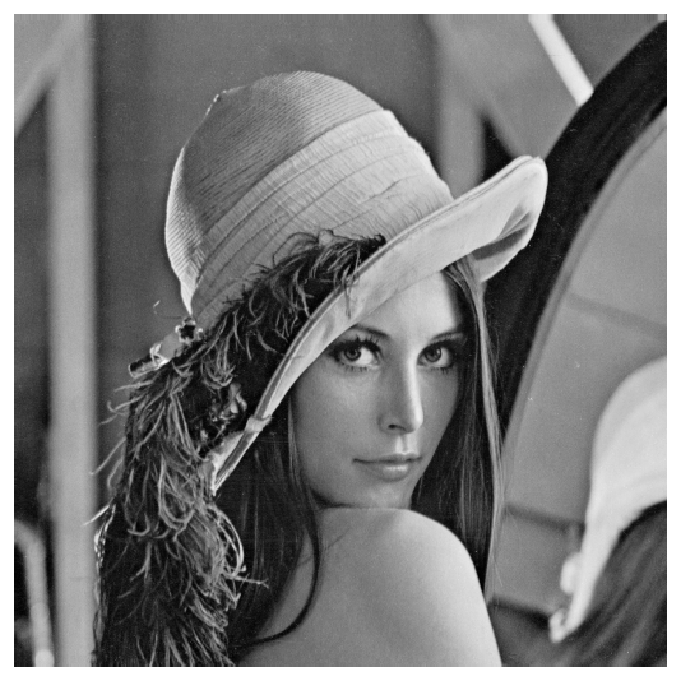

In [3]:
im = imread("data/chap12/莱娜.tiff")
imgray = rgb2gray(im)
plt.figure(figsize=(6,6))
plt.imshow(imgray,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [4]:
imgray.shape

(512, 512)

**tf.keras.layers.Conv2D(filters, strides, padding, data_format, dilation_rate,activation,...)**

tf.nn.conv2d()是一个二维卷积函数,
给定四维的input和filter tensor，计算一个二维卷积

Args:

input_shape:如果对应的层是第一层，则需要该参数指定一个输入的形状，例如，input_shape =（128，128，3），表示对于data_format =“ channels_last”（颜色通道在最后一个纬度）的128x128的RGB图片

filters: 一个整数，表示需要输出的通道数量，

stirdes: 一个包含2个整数的元组或列表，指定沿高度和宽度的卷积步幅。可以是单个整数，以为所有空间尺寸指定相同的值。

padding: 可以是"SAME"或者 "VALID",参数'SAME',表示对原始输入像素进行填充,卷积后映射的2D图像与原图大小相等,填充是指在原图像素值矩阵周围填充0像素点,"VALID"不进行填充,假设原图为 32x32 的图像,卷积和大小为 5x5 ,卷积后映射图像大小 为 28x28

data_format：字符串，channels_last（默认值）或channels_first中的一个.inputs中尺寸的顺序，channels_last对应于形状为（batch，height，width，channels）的输入，而channels_first对应于形状为（batch，channels， height，width）

dilation_rate：一个包含2个整数的元组或列表，指定用于空洞卷积的空洞率。可以是一个整数，为所有空间维指定相同的值。

activation:指定激活函数

kernel_initializer： 指定卷积核的初始化权重矩阵。


卷积后图像大小: (1, 512, 512, 1)


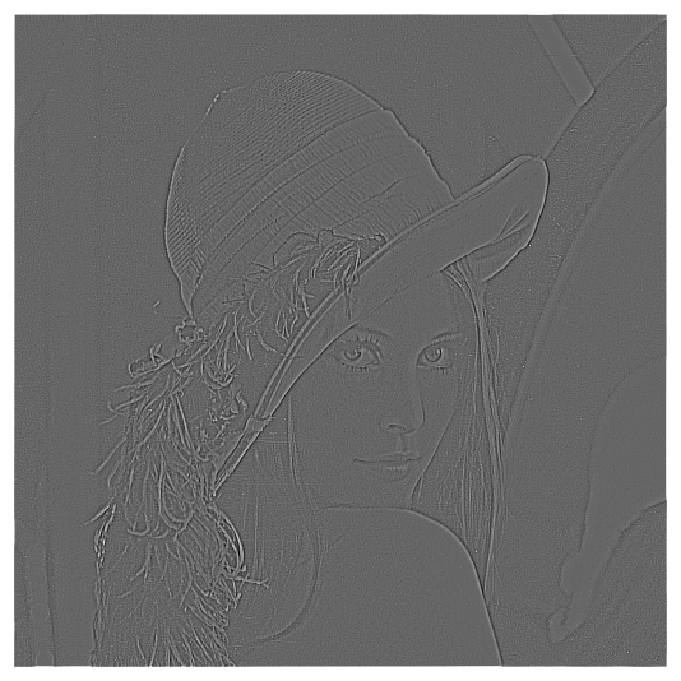

In [5]:
## 整理卷积输入
imgray = tf.convert_to_tensor(imgray,dtype=np.float32)
im_height, im_width = imgray.shape
input_im = tf.reshape(imgray, [1,im_height, im_width, 1], name="image")

## 整理卷积核,边缘检测[[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]
ker = tf.keras.initializers.constant([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
# kernel = tf.reshape(ker, [3, 3,], name='kernel')

## 卷积运算,输出卷积后的图像
res = tf.keras.layers.Conv2D(filters=1,kernel_size=[3,3],strides=1,
                             padding = "SAME",
                             input_shape=(im_height, im_width,1),
                             kernel_initializer=ker)
## 进行运算
conv_im1 = res(input_im)
print("卷积后图像大小:",conv_im1.shape)

## 查看卷积后的图像
plot_im = tf.keras.backend.reshape(conv_im1,(im_height, im_width))
plt.figure(figsize=(6,6))
plt.imshow(plot_im,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

#### 彩色图像卷积

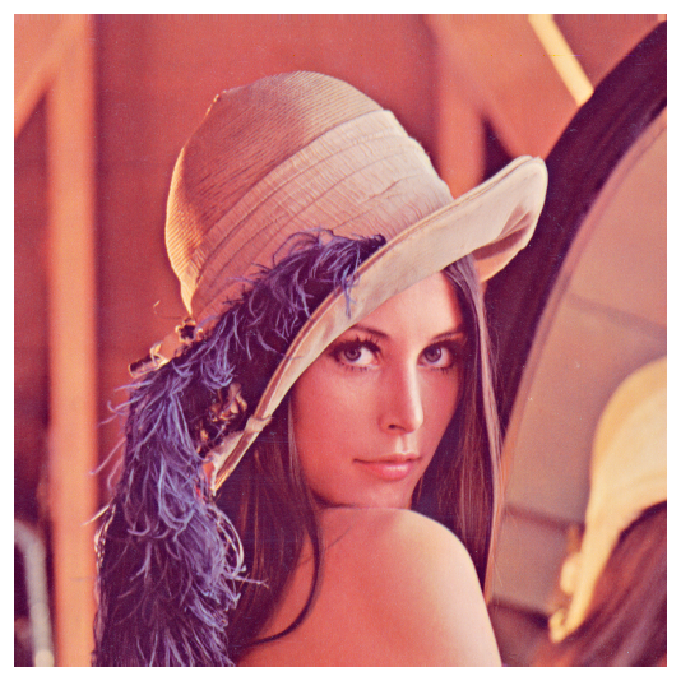

In [6]:
im = imread("data/chap12/莱娜.tiff")
plt.figure(figsize=(6,6))
plt.imshow(im)
plt.axis("off")
plt.show()

卷积后图像大小: (1, 255, 255, 2)


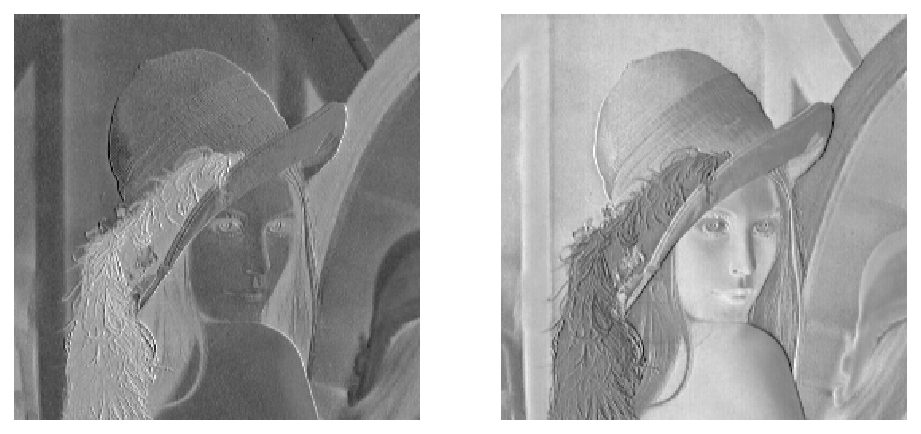

In [7]:
## 整理卷积输入,RGB图像为3通道
im = tf.convert_to_tensor(im ,dtype=np.float32)
im_height,im_width,im_channels= im.shape
input_im = tf.reshape(im, [1,im_height, im_width, im_channels])

## 整理卷积核,卷积核大小为3*3*3并且输出为2通道
ker = tf.keras.initializers.constant(
    [[[[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]],
      [[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]],
      [[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]],
     [[[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]],
      [[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]],
      [[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]]])

## 卷积运算,输出卷积后的图像
res = tf.keras.layers.Conv2D(filters=2,kernel_size=(3,3),strides=2,
                             padding = "VALID",
                             input_shape=(im_height, im_width,im_channels),
                             kernel_initializer=ker)
## 进行运算
conv_im2 = res(input_im)
print("卷积后图像大小:",conv_im2.shape)


## 查看卷积后的图像
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(conv_im2[0][:,:,0],cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(conv_im2[0][:,:,1],cmap=plt.cm.gray)
plt.axis("off")
plt.show()

### 池化
Pooling Layer池化层

当图片大小很大时内存消耗巨大，而Pooling Layer所起的作用是浓缩效果，缓解内存压力。

即选取一定大小区域，将该区域用一个代表元素表示。具体的Pooling有两种，取平均值（mean）和取最大值（max）。

tf.keras.layers.MaxPool2D(pool_size, strides, padding, data_format='NHWC')

对输入取最大值池化

pool_size：一个包含2个整数的元组或列表，要进行缩减的因子（垂直，水平）。（2，2）将在两个空间维度上将输入减半。如果仅指定一个整数，则两个窗口均将使用相同的窗口长度尺寸。

stirdes: 一个包含2个整数的元组或列表，指定沿高度和宽度的卷积步幅。可以是单个整数，以为所有空间尺寸指定相同的值。

padding: 可以是"SAME"或者 "VALID",参数'SAME',表示对原始输入像素进行填充,卷积后映射的2D图像与原图大小相等,填充是指在原图像素值矩阵周围填充0像素点,"VALID"不进行填充

data_format：字符串，channels_last（默认）或channels_first中的一个。

池化后输出结果大小: (1, 254, 254, 2)


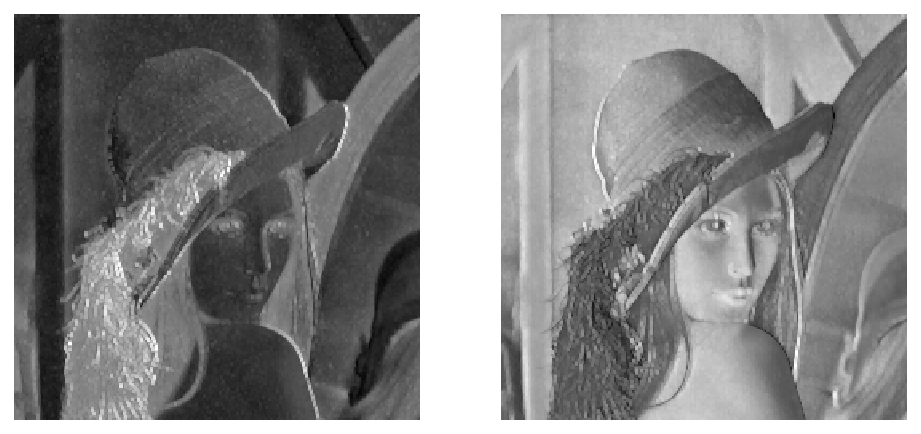

In [8]:
## 最大值的max_pool方法,
# pool_size就是kernel大小，横向纵向是2
max_pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1,padding="VALID")

## 进行运算
max_pool_val = max_pool(conv_im2)
print("池化后输出结果大小:",max_pool_val.shape)


## 查看池化后的图像
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(max_pool_val[0][:,:,0],cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(max_pool_val[0][:,:,1],cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [9]:
conv_im2.shape

TensorShape([1, 255, 255, 2])

池化后输出结果大小: (1, 127, 127, 2)


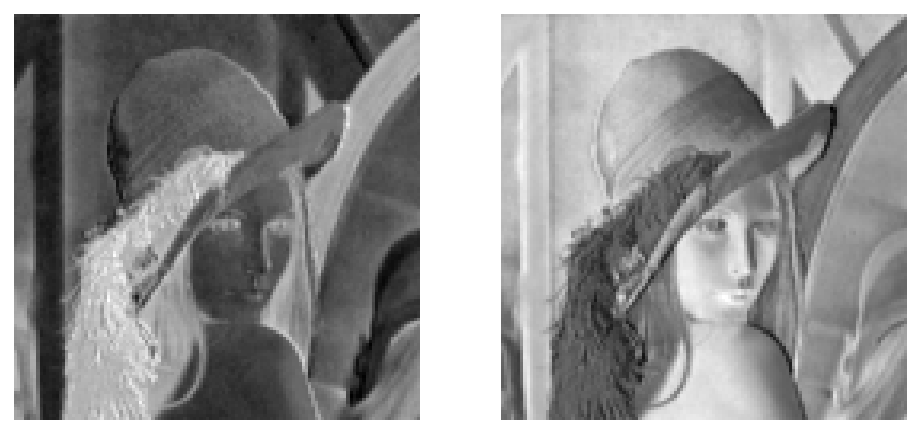

In [10]:
## 平均值池化
avg_pool = tf.keras.layers.AveragePooling2D(
    pool_size=(3,3),strides=2,padding="VALID")

avg_pool_val = avg_pool(conv_im2)

print("池化后输出结果大小:",avg_pool_val.shape)


## 查看池化后的图像
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(avg_pool_val[0][:,:,0],cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(avg_pool_val[0][:,:,1],cmap=plt.cm.gray)
plt.axis("off")
plt.show()

## 卷积神经网络人脸识别

In [3]:
## 读取数据
from scipy.io import loadmat

In [4]:
## 该数据集含有10为32*32的人脸数据，每人约324张
data = loadmat("data/chap12/MIT_face_data.mat")

In [5]:
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Mar  7 15:57:51 2018',
 '__version__': '1.0',
 '__globals__': [],
 'MIT_face': array([[0.10980392, 0.10980392, 0.10980392, ..., 0.10980392, 0.10980392,
         0.10980392],
        [0.10980392, 0.10980392, 0.10980392, ..., 0.10980392, 0.10980392,
         0.10980392],
        [0.10980392, 0.10980392, 0.10980392, ..., 0.10980392, 0.10980392,
         0.10980392],
        ...,
        [0.10980392, 0.10980392, 0.10980392, ..., 0.10980392, 0.10980392,
         0.10980392],
        [0.10980392, 0.10980392, 0.10980392, ..., 0.10980392, 0.10980392,
         0.10980392],
        [0.10980392, 0.10980392, 0.10980392, ..., 0.10980392, 0.10980392,
         0.10980392]]),
 'labels': array([[ 1,  1,  1, ..., 10, 10, 10]], dtype=uint8)}

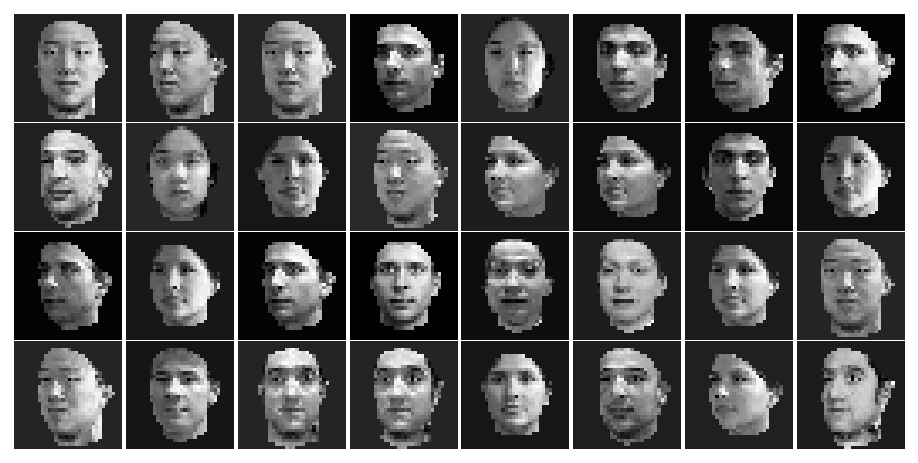

In [6]:
## 查看其中的张人脸图像
indexs = np.random.choice(np.arange(3000),32)
plt.figure(figsize=(8,4))
for ii,index in enumerate(indexs):
    plt.subplot(4,8,ii+1)
    plt.imshow(data["MIT_face"][index,:].reshape(32,32),
              cmap = plt.cm.gray)
    plt.axis("off")   
plt.subplots_adjust(hspace= 0.01,wspace=0.01)
plt.show()

In [7]:
##  切分训练集和测试集
MIT_face = data["MIT_face"]
labels = data["labels"].reshape((-1,1)) - 1
train_x,test_x,train_y,test_y = train_test_split(MIT_face,labels,
                                                 test_size = 0.25,random_state = 1)
## 将数据转化为图像的形式
train_x = train_x.reshape((-1,32,32,1))
test_x = test_x.reshape((-1,32,32,1))

In [8]:
train_x.shape

(2430, 32, 32, 1)

In [9]:
test_y.shape

(810, 1)

### 搭建我们的卷积神经网络

In [10]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Sequential

In [11]:
## 初始化网络
model = Sequential()
## 添加第一个卷积层  32*32*1 ->32*32*16
model.add(Conv2D(filters=16,kernel_size=5,padding="SAME",strides=1,
                 activation="relu",input_shape = (32,32,1)))
## 添加第一个池化层 32*32*16 ->16*16*16
model.add(MaxPool2D(pool_size=2,strides=2))
## 添加第二个卷积层  16*16*16 ->16*16*32
model.add(Conv2D(filters=32,kernel_size=5,padding="SAME",strides=1,
                 activation="relu"))
## 添加第二个池化层 16*16*32 ->8*8*32
model.add(MaxPool2D(pool_size=2,strides=2))
## 将特征映射展开 8*8*32个元素的向量
model.add(Flatten())
## 添加一个全联接层 输出512维特征
model.add(Dense(512,activation = "relu"))
## 添加一个防止过拟合的Dropout层
model.add(Dropout(0.5))
## 添加一个分类层，使用10个神经元的softmax层
model.add(Dense(10,activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0

In [12]:
## 对我们的模型进行编译和训练
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10,batch_size = 64,
                    validation_data=(test_x, test_y))

Train on 2430 samples, validate on 810 samples
Epoch 1/10
2430/2430 [==============================] - 4s 2ms/sample - loss: 2.1722 - accuracy: 0.3342 - val_loss: 1.8363 - val_accuracy: 0.7765
Epoch 2/10
2430/2430 [==============================] - 3s 1ms/sample - loss: 1.6931 - accuracy: 0.8111 - val_loss: 1.5984 - val_accuracy: 0.8951
Epoch 3/10
2430/2430 [==============================] - 3s 1ms/sample - loss: 1.5703 - accuracy: 0.8975 - val_loss: 1.5054 - val_accuracy: 0.9877
Epoch 4/10
2430/2430 [==============================] - 3s 1ms/sample - loss: 1.5009 - accuracy: 0.9753 - val_loss: 1.4636 - val_accuracy: 1.0000
Epoch 5/10
2430/2430 [==============================] - 3s 1ms/sample - loss: 1.4658 - accuracy: 0.9992 - val_loss: 1.4616 - val_accuracy: 1.0000
Epoch 6/10
2430/2430 [==============================] - 3s 1ms/sample - loss: 1.4624 - accuracy: 1.0000 - val_loss: 1.4613 - val_accuracy: 1.0000
Epoch 7/10
2430/2430 [==============================] - 3s 1ms/sample - loss:

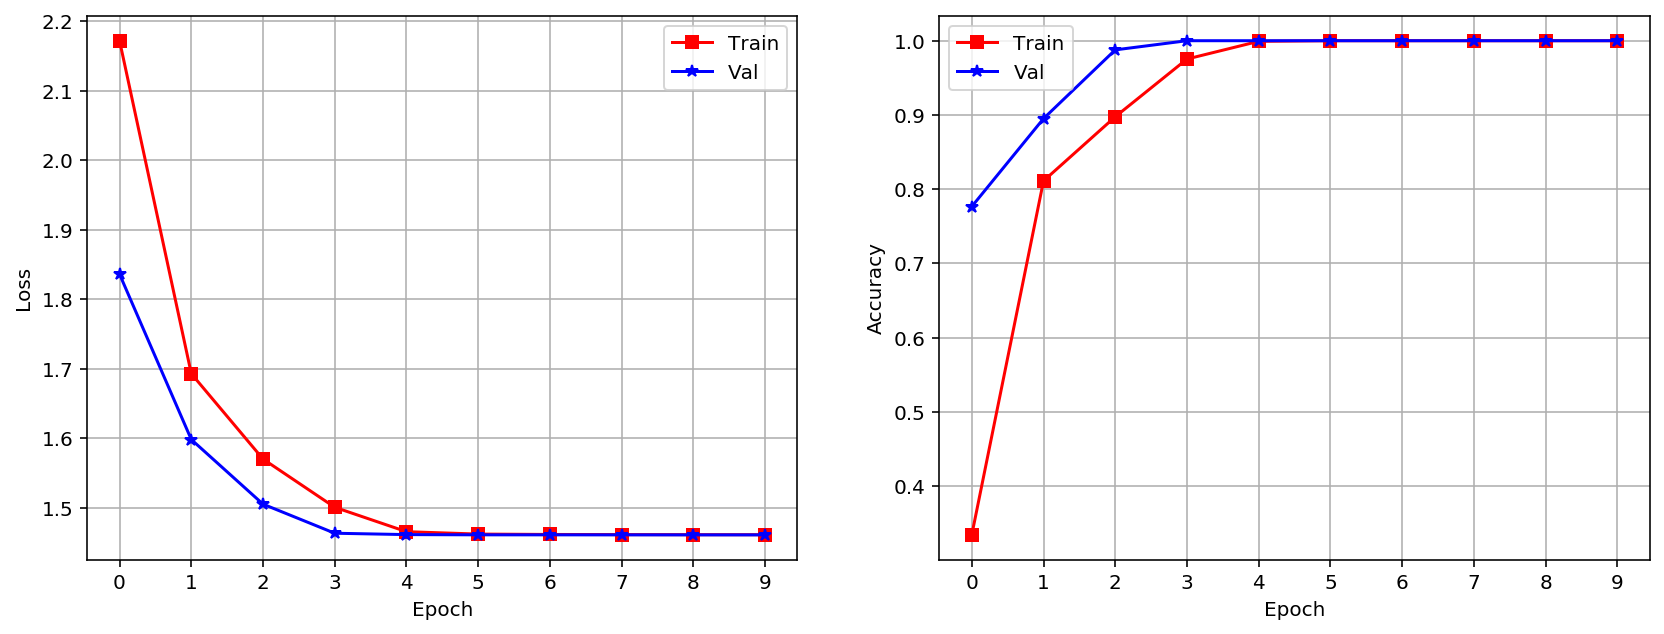

In [13]:
## 训练过程可视化
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.epoch,history.history["loss"],"rs-",label = "Train")
plt.plot(history.epoch,history.history["val_loss"],"b*-",label = "Val")
plt.xticks(history.epoch,history.epoch)
plt.grid("on")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.epoch,history.history["accuracy"],"rs-",label = "Train")
plt.plot(history.epoch,history.history["val_accuracy"],"b*-",label = "Val")
plt.xticks(history.epoch,history.epoch)
plt.grid("on")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

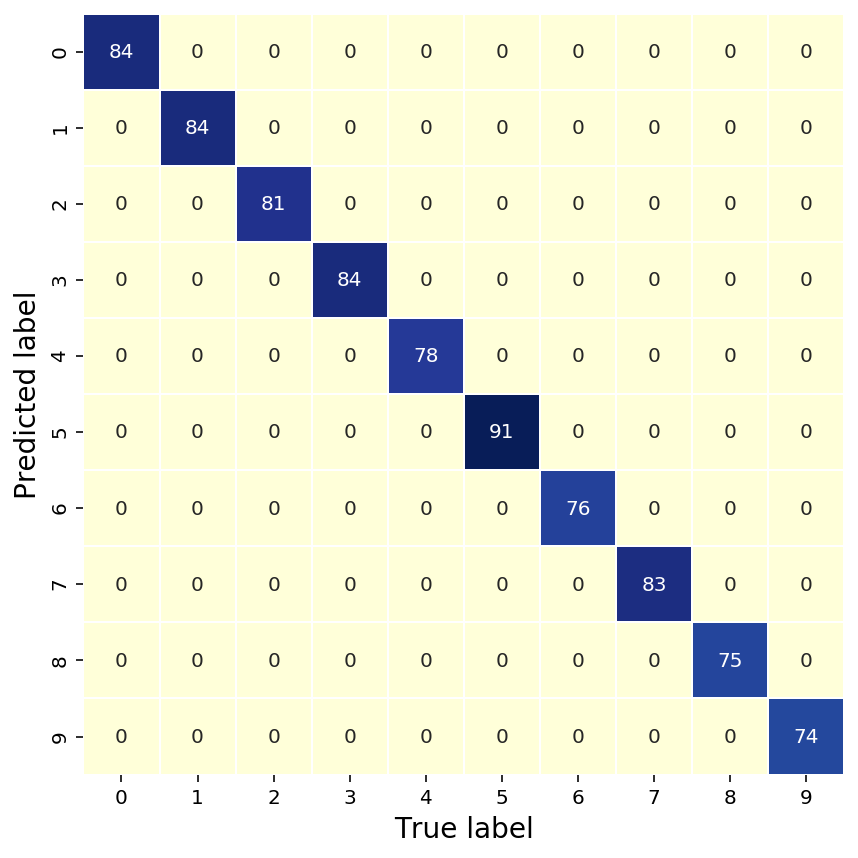

In [22]:
## 计算预测的类别
pre_y = np.argmax(model.predict(test_x), 1)
## 预测集的混淆矩阵
confm = metrics.confusion_matrix(test_y,pre_y)
plt.figure(figsize=(8,7))
sns.heatmap(confm.T, square=True, annot=True,
            fmt='d', cbar=False,linewidths=.5,
            cmap="YlGnBu")
plt.xlabel('True label',size = 14)
plt.ylabel('Predicted label',size = 14)
plt.show()

**可以看出模型的损失先快速下降，然后缓慢下降，在训练集上的精度也持续上升，最后保持平稳。**



### 可视化模型的中间特征

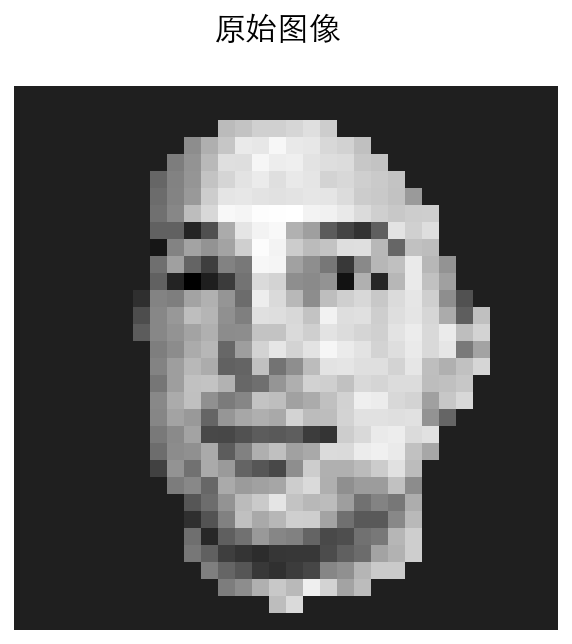

In [23]:
## 将原始图像可视化
sample1 = train_x[0:1,:]
plt.figure(figsize=(5,5))
plt.imshow(sample1.reshape(32,32),cmap=plt.cm.gray)
plt.axis("off")
plt.suptitle("原始图像",fontproperties = fonts,size = 16)
plt.show()

In [17]:
## 定义需要输出中间的层特征所在的层
layer_outputs = [layer.output for layer in model.layers[:4]] 
## 获取模型中前4层的输出的模型操作
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs) 
# 将模型操作用于预测需要获取特征的图像
activations = activation_model.predict(train_x[0:1,:]) 
len(activations)  # 输出的activations列表中包涵每个需要层的输出

4

In [25]:
activations[1].shape

(1, 16, 16, 16)

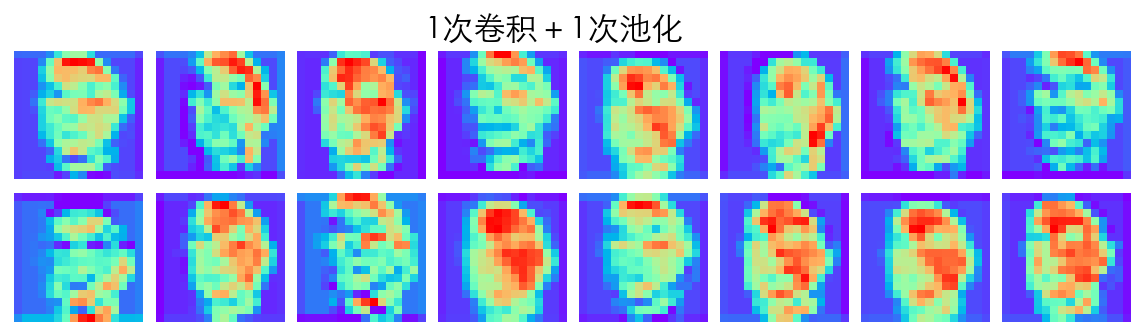

In [26]:
## 查看其中的一个特征
## 可视化其中一个样本的 feature map
sample1 = activations[1][0]
plt.figure(figsize=(10,2.5))
for ii in range(sample1.shape[2]):
    plt.subplot(2,8,ii+1)
    plt.imshow(sample1[:,:,ii],cmap=plt.cm.rainbow)
    plt.axis("off")
plt.subplots_adjust(wspace = 0.1,hspace = 0.1)    
plt.suptitle("1次卷积＋1次池化",fontproperties = fonts,size = 16)
plt.show()

In [27]:
activations[3][0].shape

(8, 8, 32)

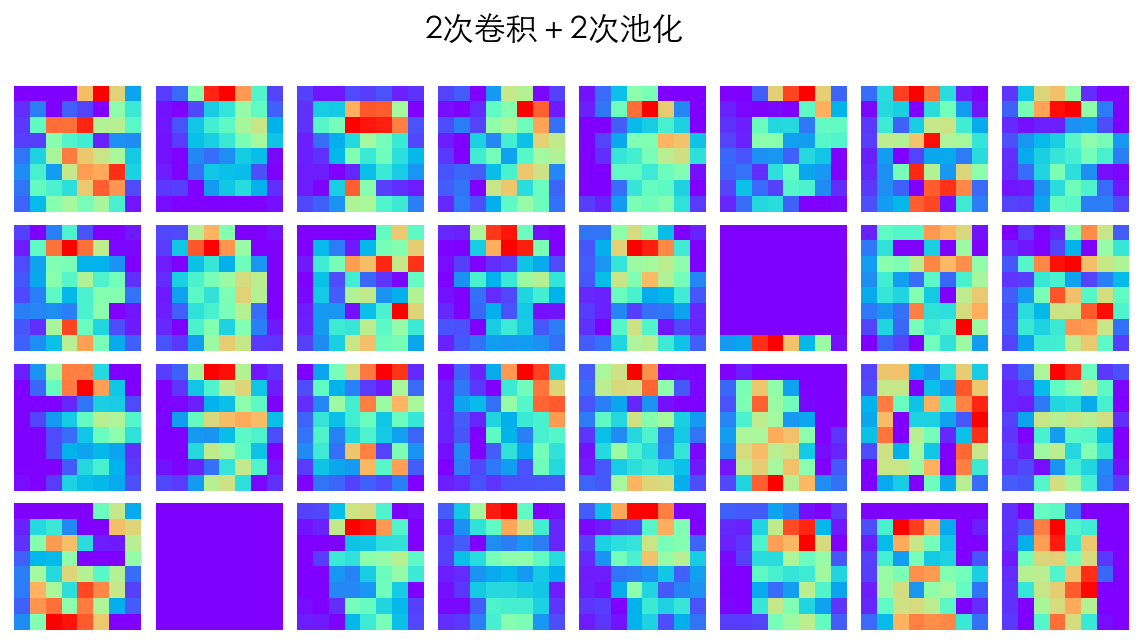

In [28]:
## 查看其中的一个特征
## 可视化其中一个样本的 feature map
sample1 = activations[3][0]
plt.figure(figsize=(10,5))
for ii in range(sample1.shape[2]):
    plt.subplot(4,8,ii+1)
    plt.imshow(sample1[:,:,ii],cmap=plt.cm.rainbow)
    plt.axis("off")
plt.subplots_adjust(wspace = 0.1,hspace = 0.1)    
plt.suptitle("2次卷积＋2次池化",fontproperties = fonts,size = 16)
plt.show()

### 可视化全连接层特征经过t-sne算法降维的可视化结果

In [21]:
## 获取模型中全联接层的输出
activation_model = tf.keras.models.Model(
    inputs=model.input,
    outputs=model.layers[6].output) 
# 将模型操作用于预测测试集
activations = activation_model.predict(test_x) 
# 每个样本会有512维的特征
activations.shape  

(810, 512)

In [22]:
## 对特征降维并可视化
from sklearn.manifold import TSNE
tsnefc = TSNE(n_components = 2).fit_transform(activations)
tsnefc.shape

(810, 2)

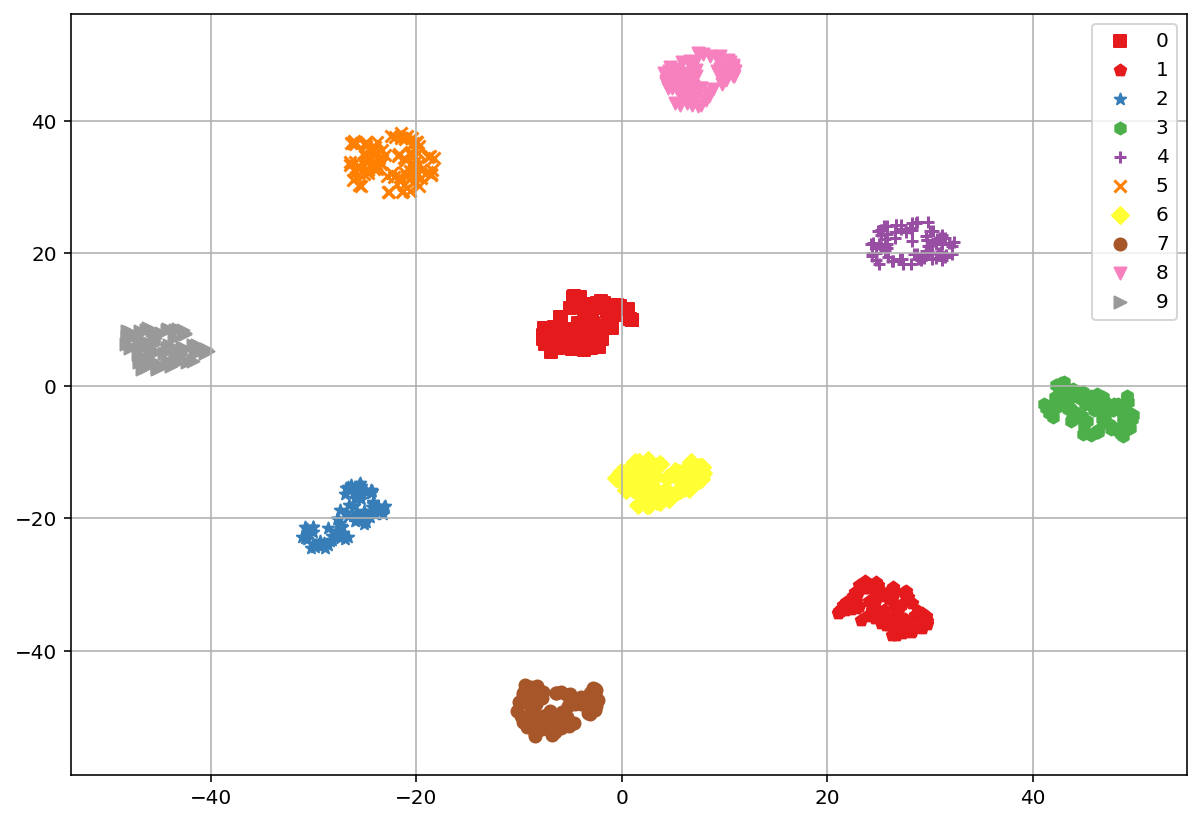

In [35]:
## 定义点使用的形状
shape = ["s","p","*","h","+","x","D","o","v",">"]
## 定义变量
X = tsnefc[:,0]
Y = tsnefc[:,1]
lab = test_y[:,0]
plt.figure(figsize=(10,7))
for ii in range(len(np.unique(lab))):
    x = X[lab==ii]
    y = Y[lab==ii]
    plt.scatter(x,y,color=plt.cm.Set1(ii / 10.),
                marker = shape[ii],label = str(ii))
    plt.legend()
plt.show()